# Polynomial Regression

Until now, We assumed that the relationship between explanatory variables and the response variable is linear. This assumption is not always true. Polynomial Regression is a special case of
multiple linear regression that adds terms with degrees greater than one to the model. Here, we will visualize polynomial regression model for the pizza predictor program and compare it with the linear models. Our Training instance consists of Diameter vs Price. The non linear model will however contain three terms. First, coefficient of x2, coefficent of x and a constant term. 

Ax2 + Bx+C

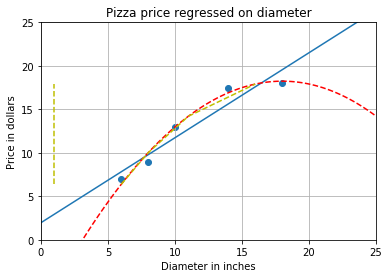

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

regressor = LinearRegression()
regressor.fit(X_train, y_train)

xx = np.linspace(0, 26, 100)
#print(xx)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
#print(yy)
plt.plot(xx, yy)

####### POLYNOMIAL OF DEGREE 2
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)

regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))

plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',linestyle='--')

plt.plot(X_test_quadratic, regressor_quadratic.predict(X_test_quadratic), c='y',linestyle='--')

plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

In [4]:
regressor_quadratic.coef_
#0x3+ 2.9x2-0.08x-8.39 =0

array([[ 0.        ,  2.95615672, -0.08202292]])

In [5]:
regressor_quadratic.intercept_

array([-8.39765458])

In [5]:
quadratic_featurizer.transform?

# R-squared

In [6]:
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared', regressor.score(X_test, y_test))
print('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test))

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345054


The ninth-degree polynomial regression model fits the training data almost exactly!
The model's r-squared score, however, is -0.09. We created an extremely complex
model that fits the training data exactly, but fails to approximate the real relationship.
This problem is called over-fitting. The model should induce a general rule to map
inputs to outputs; instead, it has memorized the inputs and outputs from the training
data. As a result, the model performs poorly on test data. It predicts that a 16 inch
pizza should cost less than dollar 10, and an 18 inch pizza should cost more than $30. This
model exactly fits the training data, but fails to learn the real relationship between size
and price.

# Cubic Polynomial vs Quadratic polynomial

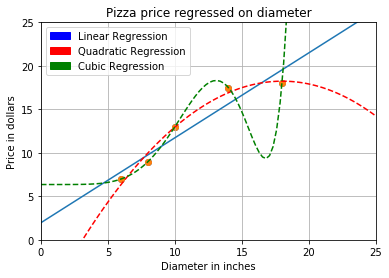

In [10]:
import matplotlib.patches as mpatches
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
# Plotting Linear Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
# 100 equally spaced samples between 0 and 26
#Shape of xx becomes (100,1) 1D to 2 D and yy also becomes 100,1
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)
#Plotting Quadratic Model
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)

regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)

# Plotting Cubic Model
cube_featurizer = PolynomialFeatures(degree=9)
X_train_cube = cube_featurizer.fit_transform(X_train)
X_test_cube = cube_featurizer.transform(X_test)
regressor_cube = LinearRegression()
regressor_cube.fit(X_train_cube, y_train)
xx_cube = cube_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_cube.predict(xx_cube), c='g',linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
red_patch=mpatches.Patch(color='red', label='Quadratic Regression')

blue_patch=mpatches.Patch(color='blue', label='Linear Regression')

green_patch=mpatches.Patch(color='green', label='Cubic Regression')
plt.legend(handles=[blue_patch, red_patch,green_patch])
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()

In [11]:
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared', regressor.score(X_test, y_test))
print('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test))
print('Cubic regression r-squared', regressor_cube.score(X_test_cube, y_test))
# Also Try for ninth degree to show how overfitting makes 
# the model complex and gives poor performance as it fails
# to capture the real relationship

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345054
Cubic regression r-squared -0.09435666704291679


###transform and fit_transform()
transform() means to center the data (make it have zero mean and unit standard error), you subtract the mean and then divide the result by the standard deviation
fit_transform() joins these two steps and is used for the initial fitting of parameters on the training set x, but it also returns a transformed x′. Internally, it just calls first fit() and then transform() on the same data.

In [7]:
regressor.coef_

array([[0.9762931]])

In [8]:
regressor.intercept_

array([1.96551724])

In [9]:
regressor_quadratic.coef_

array([[ 0.        ,  2.95615672, -0.08202292]])

In [10]:
regressor_quadratic.intercept_

array([-8.39765458])

In [5]:
#Coefficients
regressor_cube.coef_

array([[ 2.07150450e-14,  2.21989485e-09,  2.58802286e-08,
         2.11565224e-07,  1.37615666e-06,  6.86824663e-06,
         2.09951954e-05, -8.85259327e-07, -1.19794752e-07,
         5.78008691e-09]])

In [6]:
regressor_cube.intercept_

array([6.35598571])